## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

import numpy as np
import pandas as pd

from word2vec_as_EMF import Word2vecMF
from functions import *

## Load model

In [2]:
model_enwik = Word2vecMF()
model_enwik.load_matrices(from_file='enwik-200/matrices.npz')
datasets_path='datasets'

# Correlation experiments

CPU times: user 2min 29s, sys: 1min, total: 3min 30s
Wall time: 3min 31s


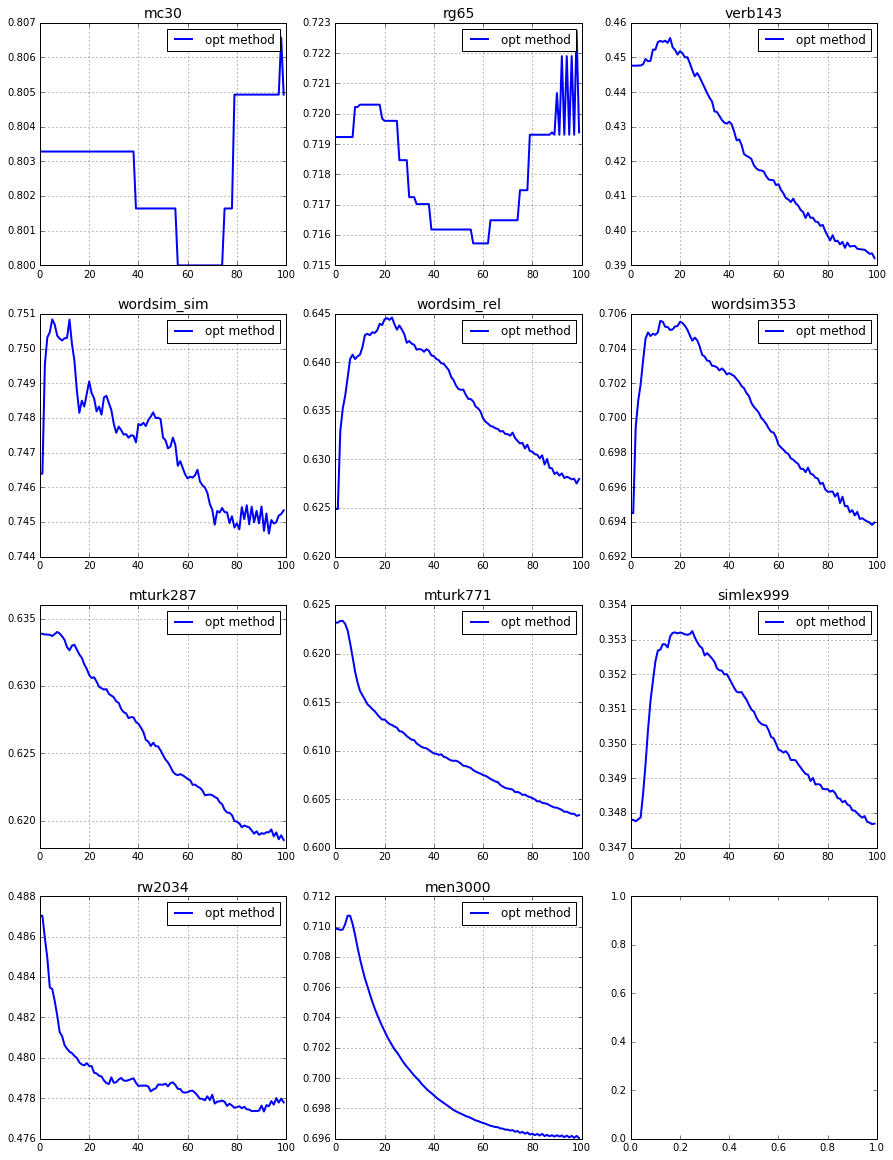

In [4]:
%%time

# Folder with factors in it
from_folder = 'enwik-200/PS100iter_fromSVD_dim200_step1e-05_factors/'

# Number of iterations on plot
MAX_ITER = 100

# Conduct experiments and save results to the dictionary
y = datasets_corr(model_enwik, datasets_path, from_folder, MAX_ITER=MAX_ITER, plot_corrs=True)

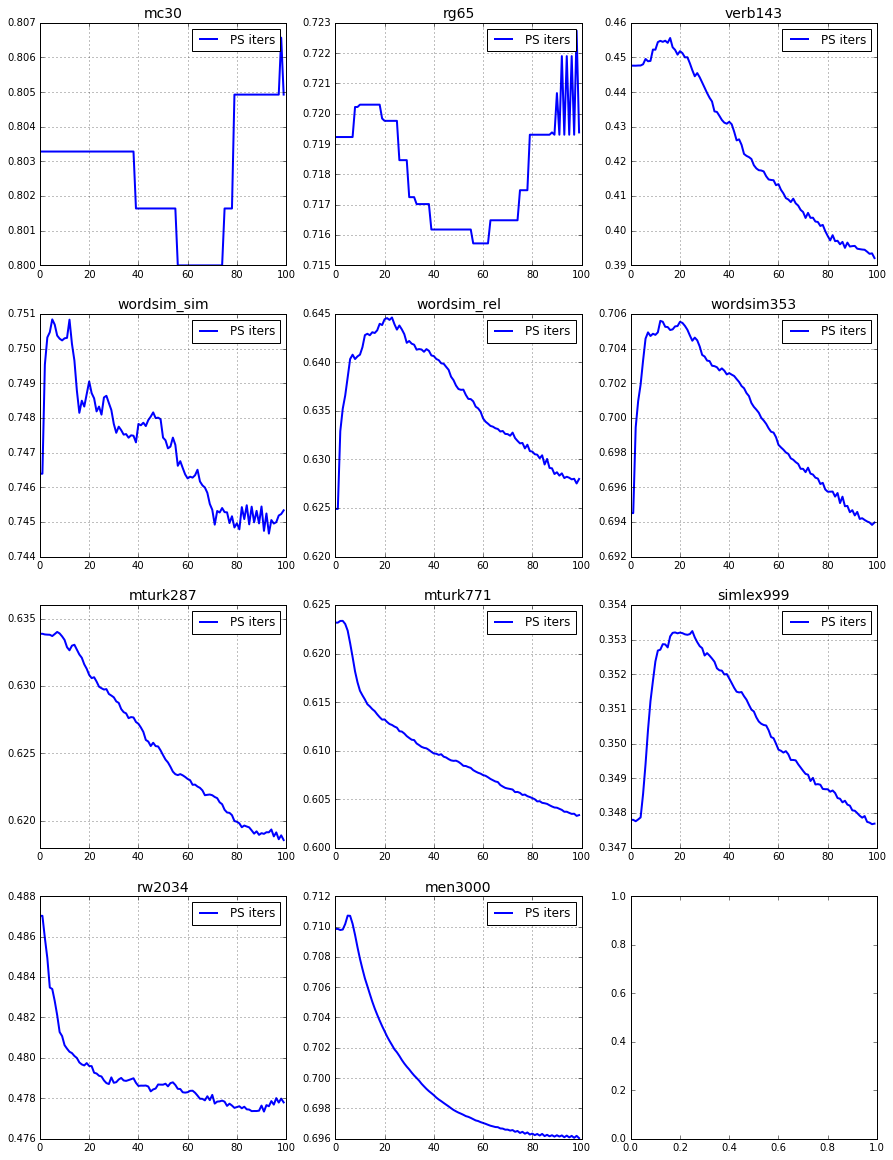

In [5]:
MAX_ITER = 100

sorted_names = ['mc30', 'rg65', 'verb143', 'wordsim_sim', 'wordsim_rel', 'wordsim353', 
                'mturk287', 'mturk771', 'simlex999', 'rw2034', 'men3000']

#w2v_ds_corrs = datasets_corr(model_enwik, datasets_path, 'enwik-200/w2v/factors200', 
#                             MAX_ITER=1, plot_corrs=False)
#svd_ds_corrs = datasets_corr(model_enwik, datasets_path, 'enwik-200/PS89iter_fromSVD_factors_step0.0001', 
#                             MAX_ITER=1, plot_corrs=False)
#glove_ds_corrs = datasets_corr(model_enwik, datasets_path, 'enwik-200/glove/factors200', 
#                             MAX_ITER=1, plot_corrs=False)


fig, ax = plt.subplots(4, 3, figsize=(15, 20))
for num, name in enumerate(sorted_names):
    x = ax[num/3,num%3]

    # plot optimisation method correlations
    x.plot(y[name][:MAX_ITER], lw=2, label='PS iters', color='blue')
    x.set_title(name, fontsize=14)

    # plot original word2vec correlations
    #w2v_corr = w2v_ds_corrs[name][0]
    #x.plot((0, MAX_ITER), (w2v_corr, w2v_corr), 'k-', color='red', lw=2, label='SGNS')

    # plot SVD correlations
    #svd_corr = svd_ds_corrs[name][0]
    #x.plot((0, MAX_ITER), (svd_corr, svd_corr), 'k-', color='green', lw=2, label='SVD')
    
    # plot GloVe correlations
    #glove_corr = glove_ds_corrs[name][0]
    #x.plot((0, MAX_ITER), (glove_corr, glove_corr), 'k-', color='purple', lw=2, label='GloVe')

    x.legend(loc='best')
    x.grid()
    
# save obtained plot to file
#plt.savefig('img/dimension500/PS_from_SVD.png')